<a href="https://colab.research.google.com/github/milu234/Client-Projects/blob/master/2020NOVMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl

In [ ]:
!pip install pandas

# New Section

In [ ]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, cross_decomposition,svm,model_selection
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

from sklearn.linear_model import LinearRegression

style.use('ggplot')

In [ ]:
df= quandl.ApiConfig.api_key = 'Gb-TjKWQyEux1RNrieys'
df = quandl.get('WIKI/GOOGL')

In [ ]:
df.head(8)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
2004-08-26,104.95,107.95,104.66,107.910,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0
2004-08-27,108.10,108.62,105.69,106.150,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0
2004-08-30,105.28,105.49,102.01,102.010,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0


In [ ]:
  df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]


In [ ]:
  df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close']*100.0
  df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100.0

  df = df[['Adj. Close', 'HL_PCT', 'PCT_Change' ,'Adj. Volume']]

In [ ]:
df.head(5)

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [ ]:
forecast_col = 'Adj. Close'

In [ ]:
df.fillna(-99999, inplace=True)

In [ ]:
forecast_out = int(math.ceil(0.01* len(df)))

In [ ]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
2004-08-26,54.122070,0.037068,2.820391,7094800.0,72.278116
2004-08-27,53.239345,2.326896,-1.803885,6211700.0,74.810934
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.199045
2004-08-31,51.343492,1.308977,0.048866,4917800.0,70.462511


In [ ]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)

In [ ]:
# X = X[:-forecast_out]
# X_lately = X[-forecast_out:]

In [ ]:
# df.dropna(inplace=True)

In [ ]:
y = np.array(df['label'])

In [ ]:
X_train , X_test, y_train , y_test = model_selection.train_test_split(X, y ,test_size = 0.2)

In [ ]:
# clf = LinearRegression(n_jobs=-1)

In [ ]:
# clf.fit(X_train, y_train)
# with open('linearregression.pickle', 'wb') as f:
#   pickle.dump(clf, f)

pickle_in = open('linearregression.pickle' ,'rb')
clf = pickle.load(pickle_in)

accuracy  = clf.score(X_test, y_test)

In [ ]:
print(accuracy)

0.9750686336910179


In [ ]:
print(forecast_out)

35


In [ ]:
  forecast_set = clf.predict(X_lately)

In [ ]:
print(forecast_set, accuracy,forecast_out)

[1008.63813604 1011.05321363 1009.8317044  1048.51195787 1052.4209348
 1052.66675828 1062.09999254 1063.41536735 1070.44627663 1062.77594374
 1073.18333054 1068.18447407 1064.90518607 1061.14670485 1062.37455309
 1056.90161668 1068.40529646 1055.51202541 1055.22221742 1070.72281106
 1072.64322436 1077.15591975 1092.10060002 1082.63670157 1055.92290212
 1055.88251241 1044.22228821 1030.46546958 1036.8500478  1051.35112626
 1064.28606188 1069.51905073 1072.48572075 1067.72451275 1071.91347389] 0.9750686336910179 35


In [ ]:
df['Forecast'] = np.nan

In [ ]:
last_date  = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

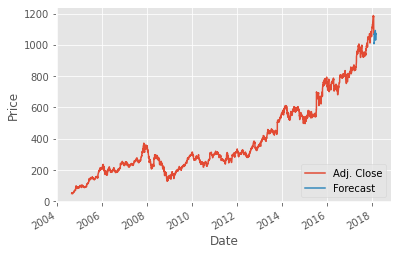

In [ ]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
